In [1]:
#### We are going to use AI models to do statistical data analysis and forecasting timseries analysis of TCS stock

In [2]:
#### We are going to use the following packages and libraries for general analysis

import pandas as pd
import numpy as np
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
data = yf.download("TCS.NS", period = "1y")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-09,3515.000000,3547.600098,3505.300049,3540.850098,3480.420410,1655427
2023-02-10,3520.000000,3542.350098,3508.149902,3537.550049,3477.176514,1187821
2023-02-13,3549.000000,3549.000000,3473.399902,3482.399902,3422.967773,1087939
2023-02-14,3505.000000,3524.850098,3495.000000,3500.100098,3440.365967,1579818
2023-02-15,3487.000000,3526.000000,3460.149902,3520.649902,3460.565186,1429449
...,...,...,...,...,...,...
2024-02-05,3983.000000,4022.000000,3962.100098,3973.300049,3973.300049,1691523
2024-02-06,3997.000000,4149.899902,3990.000000,4136.000000,4136.000000,4474396
2024-02-07,4153.000000,4155.000000,4073.949951,4083.399902,4083.399902,2124267


In [4]:
#### checking the data type
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df = data['Close']
df

Date
2023-02-09    3540.850098
2023-02-10    3537.550049
2023-02-13    3482.399902
2023-02-14    3500.100098
2023-02-15    3520.649902
                 ...     
2024-02-05    3973.300049
2024-02-06    4136.000000
2024-02-07    4083.399902
2024-02-08    4134.100098
2024-02-09    4114.600098
Name: Close, Length: 247, dtype: float64

In [6]:
#### for plotting the data we need the package
import matplotlib.pyplot as plt

**- Plotting the trending close price**

Text(0.5, 1.0, 'Trending Closed Price')

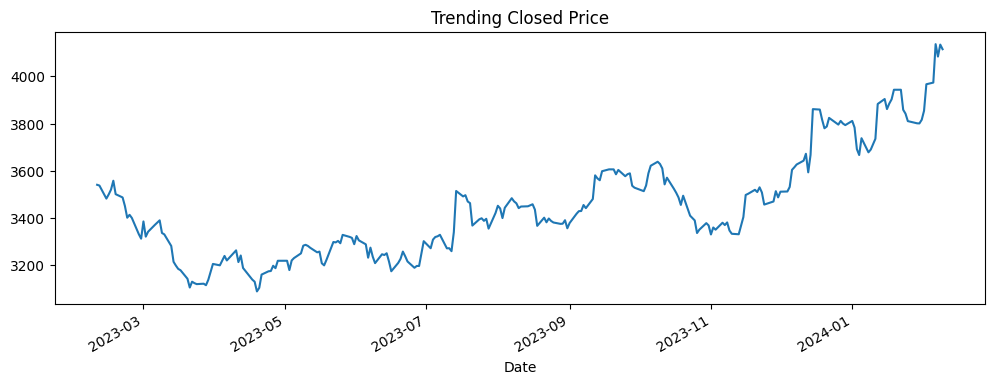

In [7]:
plt.figure(figsize=(12,4))
df.plot(linewidth = 1.5)
plt.title("Trending Closed Price")

**- Analysing closing trend in a detailed date-time structure**

In [8]:
df1 = df.reset_index()
df1

,Date,Close
0,2023-02-09,3540.850098
1,2023-02-10,3537.550049
2,2023-02-13,3482.399902
3,2023-02-14,3500.100098
4,2023-02-15,3520.649902
...,...,...
242,2024-02-05,3973.300049
243,2024-02-06,4136.000000
244,2024-02-07,4083.399902
245,2024-02-08,4134.100098


In [9]:
###converting it into datetime data type

df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [10]:
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Weekday'] = df1['Date'].dt.day_name()
df1

,Date,Close,Day,Month,Weekday
0,2023-02-09,3540.850098,9,2,Thursday
1,2023-02-10,3537.550049,10,2,Friday
2,2023-02-13,3482.399902,13,2,Monday
3,2023-02-14,3500.100098,14,2,Tuesday
4,2023-02-15,3520.649902,15,2,Wednesday
...,...,...,...,...,...
242,2024-02-05,3973.300049,5,2,Monday
243,2024-02-06,4136.000000,6,2,Tuesday
244,2024-02-07,4083.399902,7,2,Wednesday
245,2024-02-08,4134.100098,8,2,Thursday


<Axes: xlabel='Day', ylabel='Price'>

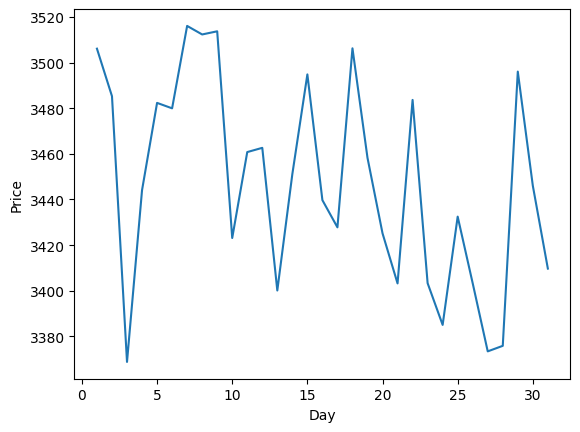

In [11]:
df1.groupby('Day')['Close'].mean().plot(xlabel="Day", ylabel="Price")

In [12]:
df1.groupby('Weekday')['Close'].mean().sort_index()

Weekday
Friday       3459.325996
Monday       3437.760417
Thursday     3450.516678
Tuesday      3447.056524
Wednesday    3441.783644
Name: Close, dtype: float64

**- Now we going to analyse 2 types of moving average**

<Axes: title={'center': 'Simple Moving Average'}, xlabel='Date'>

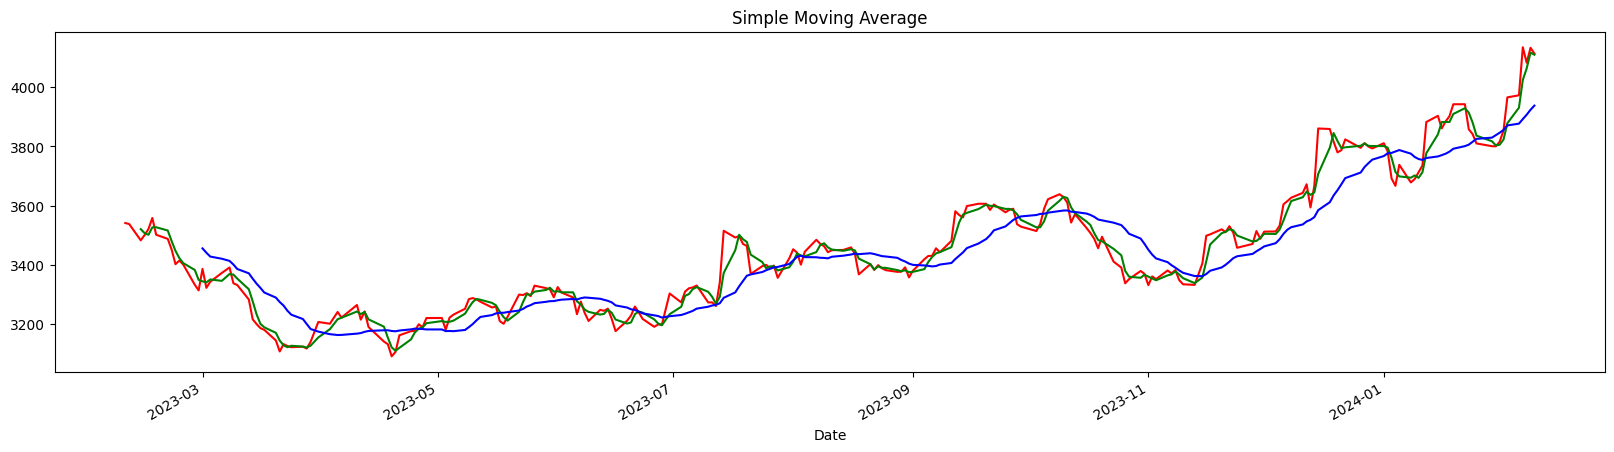

In [13]:
### creating a simple moving average
plt.figure(figsize=(20,5))
df.plot(color='red')
df.rolling(3).mean().plot(color='green')
df.rolling(15).mean().plot(title="Simple Moving Average", color='blue')

<Axes: title={'center': 'Exponential Moving Average'}, xlabel='Date'>

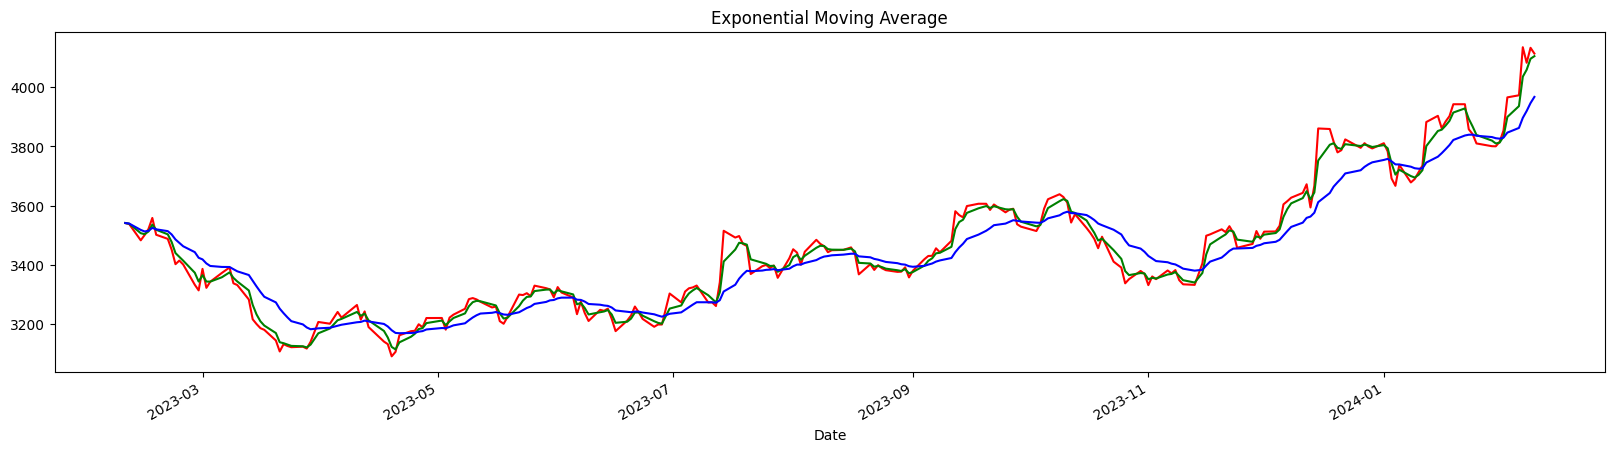

In [14]:
### creating a exponential moving average
plt.figure(figsize=(20,5))
df.plot(color='red')
df.ewm(span=3).mean().plot(title="Exponential Moving Average", color='green')
df.ewm(span=15).mean().plot(color='blue')

**- Using ARIMA for time-series and forecasting analysis**

In [15]:
### Let's check whether data is stationary or not

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
df

Date
2023-02-09    3540.850098
2023-02-10    3537.550049
2023-02-13    3482.399902
2023-02-14    3500.100098
2023-02-15    3520.649902
                 ...     
2024-02-05    3973.300049
2024-02-06    4136.000000
2024-02-07    4083.399902
2024-02-08    4134.100098
2024-02-09    4114.600098
Name: Close, Length: 247, dtype: float64

In [18]:
test_results = adfuller(df)
test_results

(0.05232532487459008,
 0.9626512903017896,
 0,
 246,
 {'1%': -3.457215237265747,
  '5%': -2.873361841566324,
  '10%': -2.5730700760129555},
 2369.519652875782)

In [19]:
df2 = df1[['Date','Close']]
df2

,Date,Close
0,2023-02-09,3540.850098
1,2023-02-10,3537.550049
2,2023-02-13,3482.399902
3,2023-02-14,3500.100098
4,2023-02-15,3520.649902
...,...,...
242,2024-02-05,3973.300049
243,2024-02-06,4136.000000
244,2024-02-07,4083.399902
245,2024-02-08,4134.100098


In [20]:
df2['Close First Diff'] = df2['Close'] - df2['Close'].shift(1)
df2['Close Seasonal Diff'] = df2['Close'] - df2['Close'].shift(12)
df2

<ipython-input-20-4e18922b8e64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close First Diff'] = df2['Close'] - df2['Close'].shift(1)
<ipython-input-20-4e18922b8e64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Close Seasonal Diff'] = df2['Close'] - df2['Close'].shift(12)


,Date,Close,Close First Diff,Close Seasonal Diff
0,2023-02-09,3540.850098,NaN,NaN
1,2023-02-10,3537.550049,-3.300049,NaN
2,2023-02-13,3482.399902,-55.150146,NaN
3,2023-02-14,3500.100098,17.700195,NaN
4,2023-02-15,3520.649902,20.549805,NaN
...,...,...,...,...
242,2024-02-05,3973.300049,7.000000,88.699951
243,2024-02-06,4136.000000,162.699951,233.399902
244,2024-02-07,4083.399902,-52.600098,140.349854
245,2024-02-08,4134.100098,50.700195,191.050049


In [21]:
test_result = adfuller(df2['Close First Diff'].dropna())
test_result

(-15.19770553789127,
 5.888816958400631e-28,
 0,
 245,
 {'1%': -3.4573260719088132,
  '5%': -2.873410402808354,
  '10%': -2.573095980841316},
 2359.584943672071)

<Axes: >

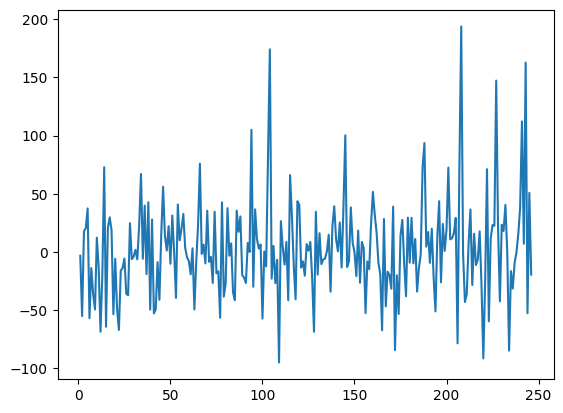

In [22]:
df2['Close First Diff'].plot()

In [23]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

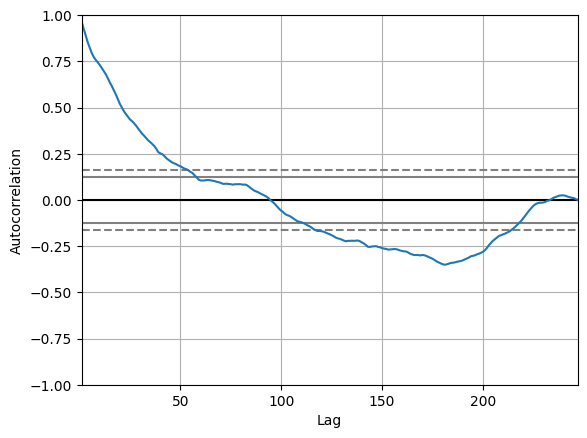

In [24]:
autocorrelation_plot(df2['Close'])

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

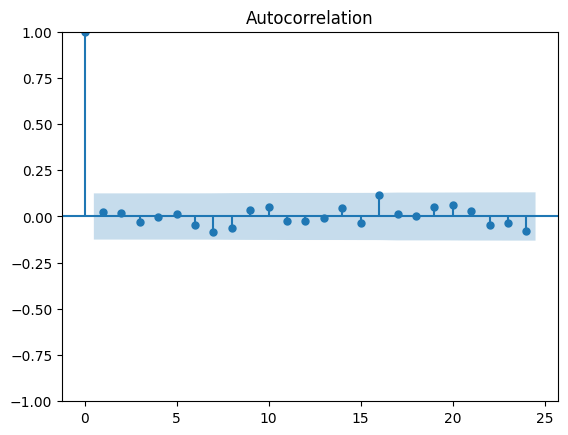

In [26]:
plot_acf(df2['Close First Diff'].dropna())
plt.show()

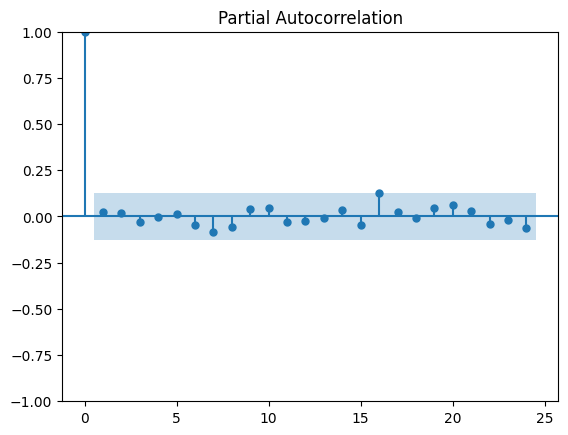

In [27]:
plot_pacf(df2['Close First Diff'].dropna())
plt.show()

In [29]:
### so we have value of p,d,q as 1,1,1 respectively
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df2['Close'], order = (1,1,1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  247
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1265.749
Date:                Fri, 09 Feb 2024   AIC                           2537.498
Time:                        05:48:47   BIC                           2548.014
Sample:                             0   HQIC                          2541.733
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2638      1.650      0.160      0.873      -2.971       3.499
ma.L1         -0.2346      1.654     -0.142      0.887      -3.476       3.007
sigma2      1724.9605    113.485     15.200      0.000    1502.534    1947.387
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               153.99
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.25   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

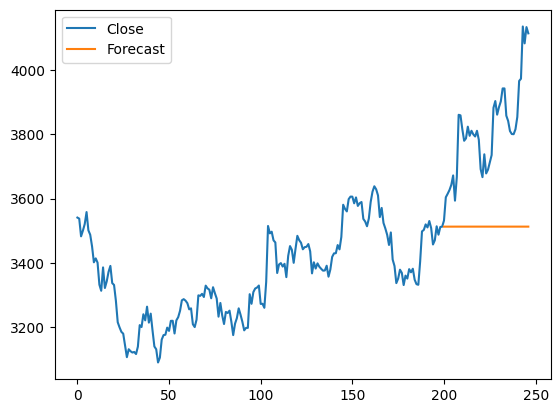

In [32]:
df2['Forecast'] = model_fit.predict(start = 200, end = 246, dynamic = True)
df2[['Close', 'Forecast']].plot()

In [34]:
import statsmodels.api as sm

In [36]:
model1 = sm.tsa.statespace.SARIMAX(df2['Close'], seasonal_order = (1,1,1,12))
results = model1.fit()
print(results)

<Axes: >

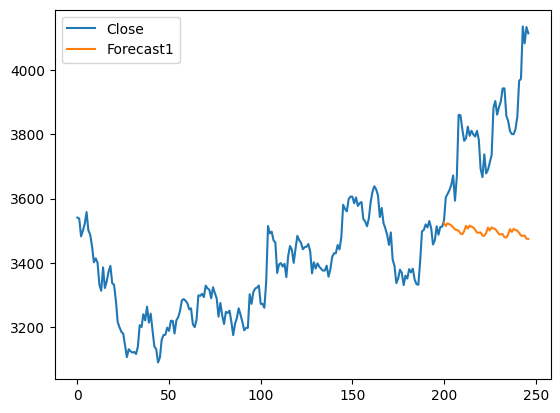

In [42]:
df2['Forecast1'] = results.predict(start = 200, end = 246, dynamic = True)
df2[['Close', 'Forecast1']].plot()

In [43]:
df2

,Date,Close,Close First Diff,Close Seasonal Diff,Forecast,Forecast1
0,2023-02-09,3540.850098,NaN,NaN,NaN,NaN
1,2023-02-10,3537.550049,-3.300049,NaN,NaN,NaN
2,2023-02-13,3482.399902,-55.150146,NaN,NaN,NaN
3,2023-02-14,3500.100098,17.700195,NaN,NaN,NaN
4,2023-02-15,3520.649902,20.549805,NaN,NaN,NaN
...,...,...,...,...,...,...
242,2024-02-05,3973.300049,7.000000,88.699951,3512.670923,3484.642119
243,2024-02-06,4136.000000,162.699951,233.399902,3512.670923,3484.184193
244,2024-02-07,4083.399902,-52.600098,140.349854,3512.670923,3484.872923
245,2024-02-08,4134.100098,50.700195,191.050049,3512.670923,3475.250337


In [44]:
dd = pd.DataFrame(pd.date_range('2024-02-09', '2024-02-14'), columns = ['Date'])
dd['Close'] = np.nan

In [45]:
dd.set_index('Date', inplace=True)

In [46]:
dd

,Close
Date,
2024-02-09,NaN
2024-02-10,NaN
2024-02-11,NaN
2024-02-12,NaN
2024-02-13,NaN
2024-02-14,NaN


In [57]:
forecast = results.predict(start = len(df2), end = (len(df2)) + 40, typ = 'levels').rename("Forecast")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: title={'center': 'Prediction of next 40 values'}>

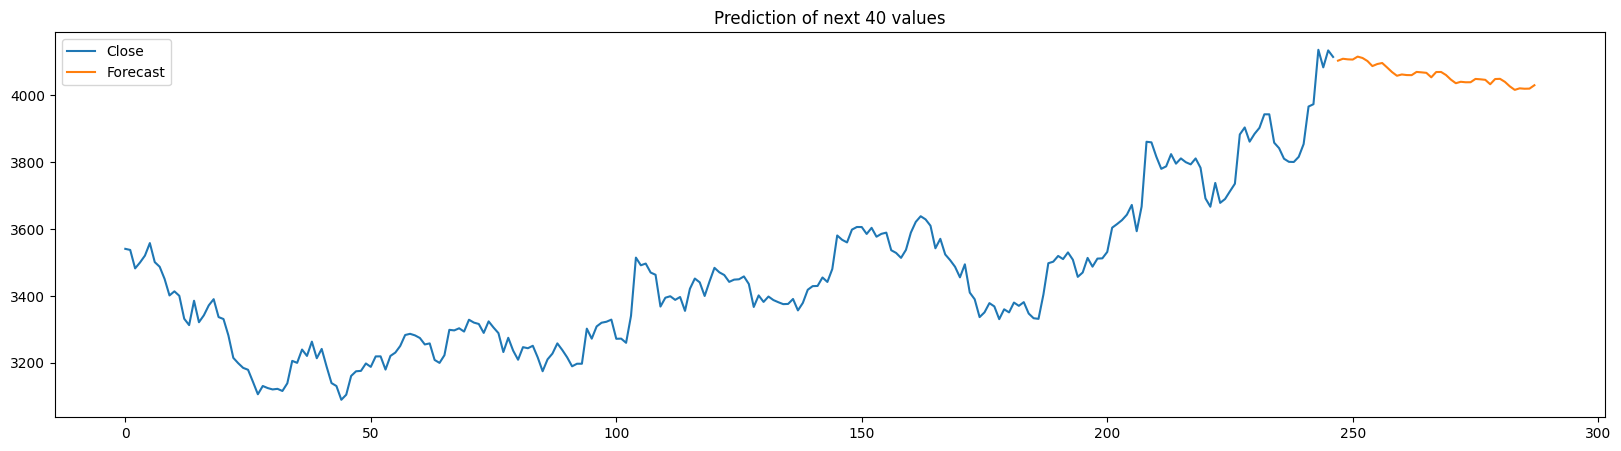

In [59]:
df2['Close'].plot(figsize=(20,5), legend=True, title = "Prediction of next 40 values")
forecast.plot(legend = True)